In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'E:\College\dsc-works\Attrition Forecast\Data\HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
selected_columns = ['Age', 'JobRole', 'JobSatisfaction', 'PerformanceRating', 'Attrition']
df = df[selected_columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1470 non-null   int64 
 1   JobRole            1470 non-null   object
 2   JobSatisfaction    1470 non-null   int64 
 3   PerformanceRating  1470 non-null   int64 
 4   Attrition          1470 non-null   object
dtypes: int64(3), object(2)
memory usage: 57.6+ KB


In [8]:
df.duplicated().sum()

491

In [9]:
df.isna().sum()

Age                  0
JobRole              0
JobSatisfaction      0
PerformanceRating    0
Attrition            0
dtype: int64

In [10]:
df.nunique()

Age                  43
JobRole               9
JobSatisfaction       4
PerformanceRating     2
Attrition             2
dtype: int64

In [11]:
df.describe()

,Age,JobSatisfaction,PerformanceRating
count,1470.000000,1470.000000,1470.000000
mean,36.923810,2.728571,3.153741
std,9.135373,1.102846,0.360824
min,18.000000,1.000000,3.000000
25%,30.000000,2.000000,3.000000
50%,36.000000,3.000000,3.000000
75%,43.000000,4.000000,3.000000
max,60.000000,4.000000,4.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0


In [13]:
df

,Age,JobRole,JobSatisfaction,PerformanceRating,Attrition
0,41,Sales Executive,4,3,Yes
1,49,Research Scientist,2,4,No
2,37,Laboratory Technician,3,3,Yes
3,33,Research Scientist,3,3,No
4,27,Laboratory Technician,2,3,No
...,...,...,...,...,...
1465,36,Laboratory Technician,4,3,No
1466,39,Healthcare Representative,1,3,No
1467,27,Manufacturing Director,2,4,No
1468,49,Sales Executive,2,3,No


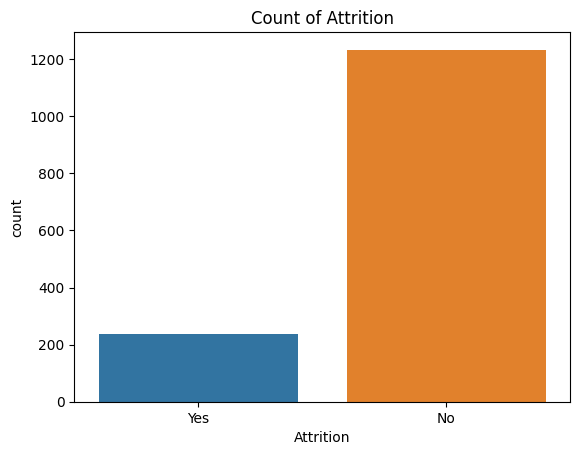

In [29]:
sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')
plt.show()

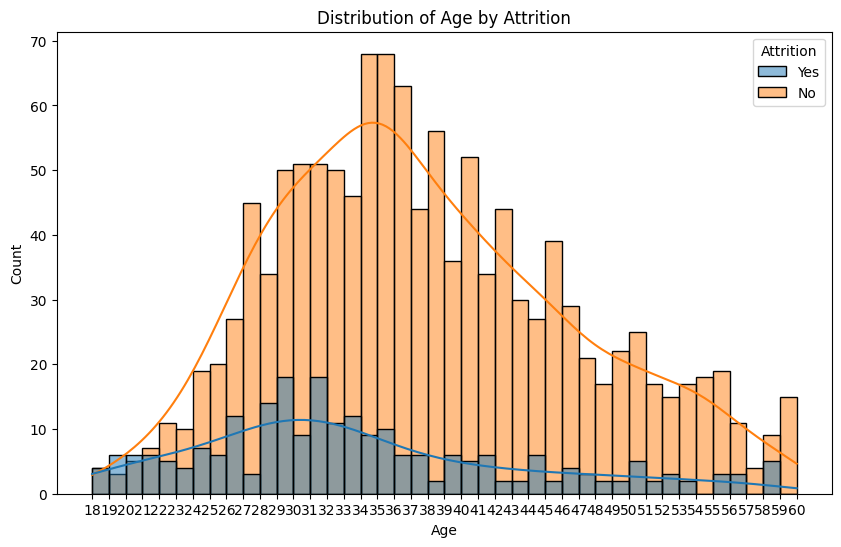

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20,binwidth=1, kde=True)
plt.xticks(ticks=df['Age'].unique(), labels=df['Age'].unique())
plt.title('Distribution of Age by Attrition')
plt.show()

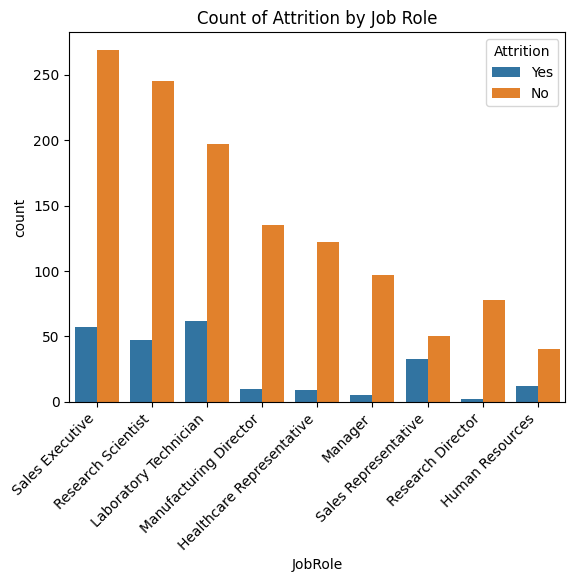

In [16]:
sns.countplot(data=df, x='JobRole', hue='Attrition',)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Attrition by Job Role')
plt.show()

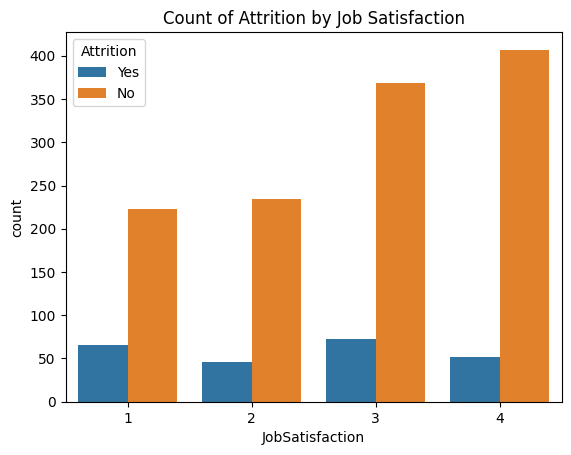

In [17]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Count of Attrition by Job Satisfaction')
plt.show()

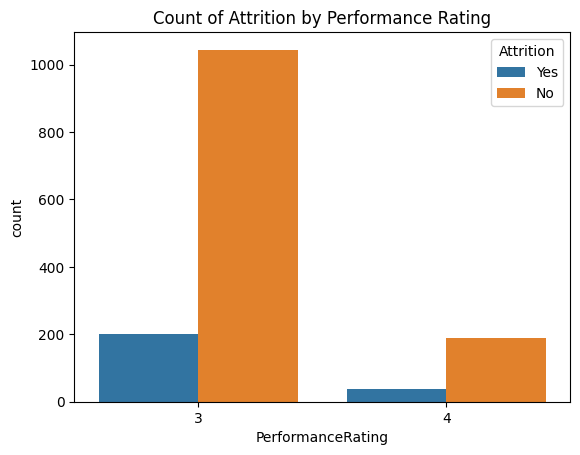

In [18]:
sns.countplot(data=df, x='PerformanceRating', hue='Attrition')
plt.title('Count of Attrition by Performance Rating')
plt.show()

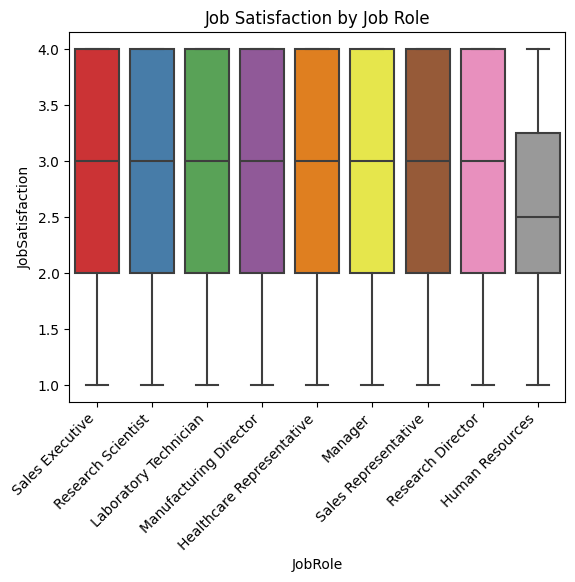

In [22]:
sns.boxplot(data=df, x='JobRole', y='JobSatisfaction', palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.title('Job Satisfaction by Job Role')
plt.show()

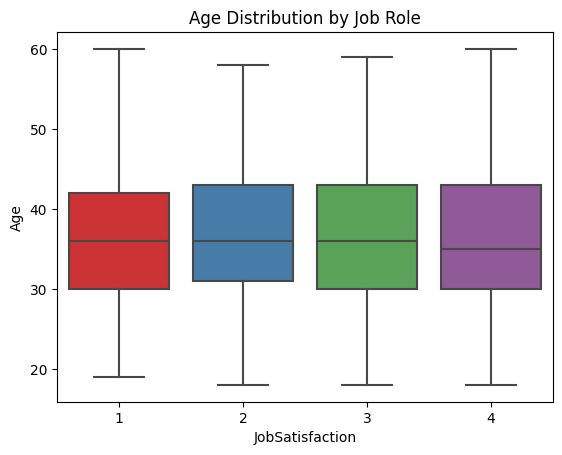

In [27]:
sns.boxplot(data=df, x='JobSatisfaction', y='Age', palette='Set1')
plt.title('Age Distribution by Job Role')
plt.show()